In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 500

In [2]:
fields = ['field_overview',
          'field_status',
          'field_operators',
          'field_owners',
          'field_licensees',
          'field_reserves',
          'field_inplaceVol',
          'field_description',
         ]

In [3]:
from load import load

# Overview

In [4]:
overview = load(fields[0])

In [50]:
overview.head()

,fldName,cmpLongName,fldCurrentActivitySatus,wlbName,wlbCompletionDate,fldMainArea,fldOwnerKind,fldOwnerName,fldMainSupplyBase,fldNpdidOwner,fldNpdidField,wlbNpdidWellbore,cmpNpdidCompany,fldFactPageUrl,fldFactMapUrl,fldDateUpdated,fldDateUpdatedMax
0,ALBUSKJELL,ConocoPhillips Skandinavia AS,Shut down,1/6-1,1972-11-26,North Sea,PRODUCTION LICENSE,018,NaN,20900.0,43437,239,2410696.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-26
1,ALVE,Equinor Energy AS,Producing,6507/3-1,1990-10-26,Norwegian Sea,PRODUCTION LICENSE,159 B,Sandnessjøen,2819945.0,4444332,1533,32011216.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-25
2,ALVHEIM,Aker BP ASA,Producing,24/6-2,1998-07-08,North Sea,PRODUCTION LICENSE,203,NaN,22436.0,2845712,3397,28544099.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-09,2020-04-15
3,ATLA,Total E&P Norge AS,Producing,25/5-7,2010-10-23,North Sea,PRODUCTION LICENSE,102 C,NaN,5467035.0,21106284,6423,2410708.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2020-02-08,2020-02-25
4,BALDER,Vår Energi AS,Producing,25/11-1,1967-07-09,North Sea,PRODUCTION LICENSE,001,Dusavik,20756.0,43562,143,33360957.0,https://factpages.npd.no/factpages/default.asp...,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...,2019-10-03,2020-02-26


In [6]:
overview.groupby('fldCurrentActivitySatus').size()

fldCurrentActivitySatus
Approved for production     9
Producing                  90
Shut down                  25
dtype: int64

In [49]:
# print(len(overview[overview.fldCurrentActivitySatus=='Shut down'])) # 25 includes NaN
# overview[overview['fldCurrentActivitySatus']=="Shut down"]['cmpLongName'] # 22 no NaN

In [8]:
producing_fields = overview[overview['fldCurrentActivitySatus']=='Producing']['cmpLongName'].value_counts()
producing_approved_fields = overview[overview['fldCurrentActivitySatus'].isin(['Approved for production'])]['cmpLongName'].value_counts()
shutdown_fields = overview[overview['fldCurrentActivitySatus']=="Shut down"]['cmpLongName'].value_counts()

In [9]:
print(f"Number of fields: {overview.shape[0]}")
print(f"Number of producing fields: {producing_fields.sum()}")
print(f"Number of producing and approved fields: {producing_approved_fields.sum()}")
print(f"Number of shut down fields: {shutdown_fields.sum()}") # doesn't include 3 NaN entries

Number of fields: 124
Number of producing fields: 90
Number of producing and approved fields: 9
Number of shut down fields: 22


## Status of Fields by Area

In [10]:
data = overview.groupby(['fldMainArea', 'fldCurrentActivitySatus']).size().unstack()
data#.plot(kind='bar', figsize=(10,6))

fldCurrentActivitySatus,Approved for production,Producing,Shut down
fldMainArea,,,
Barents Sea,1.0,2.0,NaN
North Sea,6.0,67.0,24.0
Norwegian Sea,2.0,21.0,1.0


# Operators

In [11]:
operators = load(fields[2])

In [47]:
# operators.head()

In [13]:
print(f" Number of Operators: {operators['cmpLongName'].nunique()}")
print(f" Number of Fields: {operators['fldName'].nunique()}")

 Number of Operators: 78
 Number of Fields: 124


In [15]:
# Current Operators don't have a date in the 'fldOperatorTo' field
operators[operators['fldOperatorTo'].isnull()]['cmpLongName'].value_counts() # 121 - doesn't include NaN

Equinor Energy AS                   59
Aker BP ASA                         19
ConocoPhillips Skandinavia AS        9
Wintershall Dea Norge AS             5
Vår Energi AS                        5
Repsol Norge AS                      4
A/S Norske Shell                     3
Neptune Energy Norge AS              3
Lundin Energy Norway AS              3
DNO Norge AS                         2
Total E&P Norge AS                   2
Spirit Energy Norway AS              2
Total E&P UK Ltd                     1
Chrysaor Norge AS                    1
Petrogas NEO UK Ltd                  1
Repsol Sinopec North Sea Limited     1
OKEA ASA                             1
Name: cmpLongName, dtype: int64

# Licensees

In [16]:
licensees = load(fields[4])

In [18]:
# Current licences don't have a date in 'fldLicenseeTo' field.
curr_lic = licensees[licensees.fldLicenseeTo.isnull()]

## Current Licensee Companies

<AxesSubplot:>

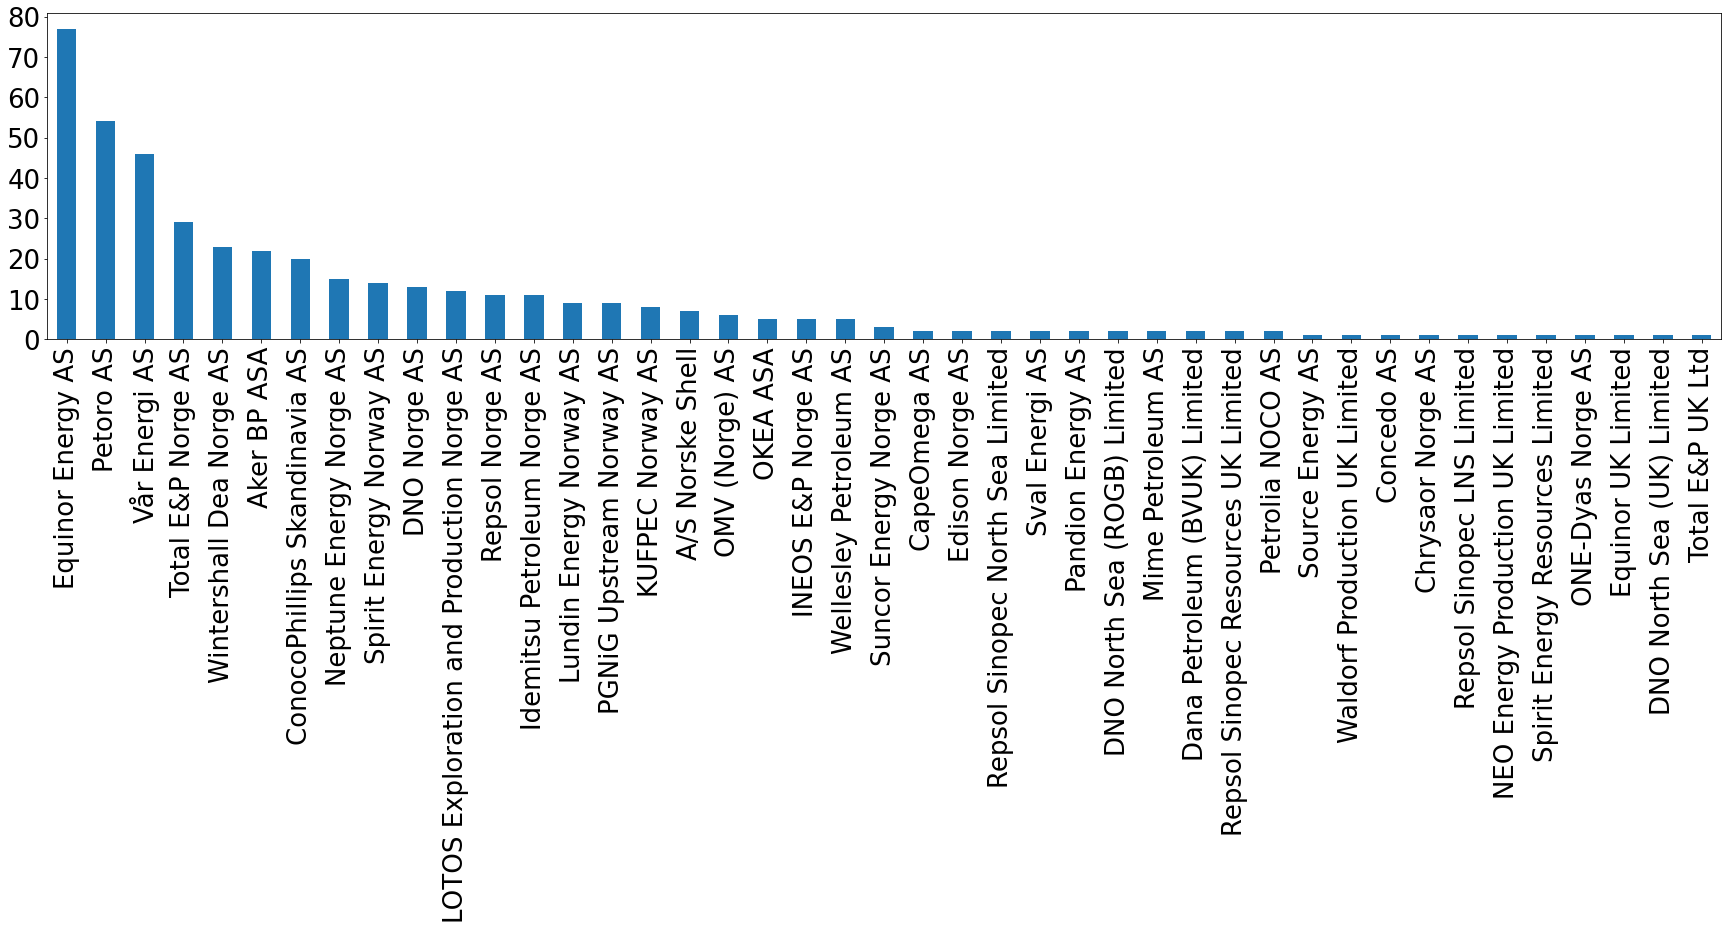

In [56]:
curr_lic.cmpLongName.value_counts().plot(kind='bar', figsize=(30,6), fontsize=26)

In [21]:
licensees.loc[licensees.groupby('fldName').fldLicenseeFrom.idxmax(),:].nunique()

fldName                   124
fldOwnerName              107
fldOwnerKind                2
fldOwnerFrom              102
fldOwnerTo                  2
fldLicenseeFrom            33
fldLicenseeTo               3
cmpLongName                20
fldCompanyShare            69
fldSdfiShare                0
fldNpdidField             124
cmpNpdidCompany            20
fldLicenseeDateUpdated     21
dtype: int64

## Number of Licensees per Field

In [22]:
curr_lic.groupby('fldName').size()

fldName
AASTA HANSTEEN      4
ALBUSKJELL          5
ALVE                3
ALVHEIM             3
ATLA                4
BALDER              2
BAUGE               4
BLANE               5
BRAGE               5
BRYNHILD            2
BYRDING             3
BØYLA               3
COD                 5
DRAUGEN             3
DUVA                4
DVALIN              3
EDDA                5
EDVARD GRIEG        3
EKOFISK             5
ELDFISK             5
EMBLA               5
ENOCH               9
FENJA               4
FLYNDRE             5
FRAM                4
FRAM H-NORD         4
FRIGG               2
FRØY                2
GAUPE               2
GIMLE               3
GINA KROG           3
GJØA                4
GOLIAT              2
GRANE               4
GUDRUN              4
GULLFAKS            3
GULLFAKS SØR        3
GUNGNE              4
GYDA                3
HANZ                3
HEIDRUN             4
HEIMDAL             5
HOD                 2
HULDRA              3
HYME                4
IS

In [23]:
print(f"Number of Licensees: {licensees['cmpLongName'].nunique()}")
print(f"Number of Fields: {licensees['fldName'].nunique()}")

Number of Licensees: 232
Number of Fields: 124


In [24]:
# licensees['cmpLongName'].unique()

In [25]:
lotus = licensees[licensees['cmpLongName']=='LOTOS Exploration and Production Norge AS']

In [26]:
lotus = lotus.loc[lotus.groupby('fldName').fldLicenseeFrom.idxmax(),:]

In [27]:
print(f"Number of licences: {len(lotus)}")

Number of licences: 12


In [28]:
lotus.head()

,fldName,fldOwnerName,fldOwnerKind,fldOwnerFrom,fldOwnerTo,fldLicenseeFrom,fldLicenseeTo,cmpLongName,fldCompanyShare,fldSdfiShare,fldNpdidField,cmpNpdidCompany,fldLicenseeDateUpdated
218,ATLA,102 C,PRODUCTION LICENSE,2011-11-04,NaN,2016-09-30,NaN,LOTOS Exploration and Production Norge AS,20.00,NaN,21106284,5064434,2019-10-03
2223,FRØY,364,PRODUCTION LICENSE,2006-01-06,NaN,2017-07-12,NaN,LOTOS Exploration and Production Norge AS,9.74,NaN,43597,5064434,2019-10-03
2629,GUNGNE,046,PRODUCTION LICENSE,1995-08-29,NaN,2019-12-10,NaN,LOTOS Exploration and Production Norge AS,15.00,NaN,43464,5064434,2019-12-12
2877,HEIMDAL,036 BS,PRODUCTION LICENSE,2003-10-13,NaN,2018-12-04,NaN,LOTOS Exploration and Production Norge AS,5.00,NaN,43590,5064434,2019-10-03
3660,LILLE-FRIGG,873,PRODUCTION LICENSE,2017-02-10,NaN,2018-05-16,NaN,LOTOS Exploration and Production Norge AS,20.00,NaN,43583,5064434,2019-10-03


In [29]:
lotus_fields = lotus['fldName']
lotus_fields

218              ATLA
2223             FRØY
2629           GUNGNE
2877          HEIMDAL
3660      LILLE-FRIGG
5035           SKIRNE
5076    SLEIPNER VEST
5146     SLEIPNER ØST
7323           UTGARD
7330             VALE
8208              YME
8335        ØST FRIGG
Name: fldName, dtype: object

# Status

In [30]:
status = load(fields[1])

In [31]:
status.head()

,fldName,fldStatusFromDate,fldStatusToDate,fldStatus,fldNpdidField,fldStatusDateUpdated
0,ALBUSKJELL,1975-04-25,1979-05-25,Approved for production,43437,2018-03-16
1,ALBUSKJELL,1979-05-26,1998-08-25,Producing,43437,2018-03-16
2,ALBUSKJELL,1998-08-26,NaT,Shut down,43437,2018-03-16
3,ALVE,2007-03-16,2009-03-18,Approved for production,4444332,2017-04-11
4,ALVE,2009-03-19,NaT,Producing,4444332,2017-04-11


In [32]:
status.dropna(inplace=True)

status = status.loc[status.groupby('fldName').fldStatusToDate.idxmax(),:]

In [33]:
status['fldStatus'].value_counts()
#  the headings and values look transposed

Approved for production    91
Producing                  24
Shut down                   1
Name: fldStatus, dtype: int64

In [34]:
status['fldName'].nunique()

116

# In place volumes

In [35]:
inplacevols = load(fields[6])

## In place volumes for specified Company

In [37]:
ipvols_lotus = pd.DataFrame()
# type to list for iterable
for field in list(lotus_fields):
    if field in list(inplacevols['fldName']):
        ipvols_lotus = ipvols_lotus.append(inplacevols[inplacevols['fldName']==field])

ipvols_lotus.loc['Column_Total'] = ipvols_lotus.sum(numeric_only=True, axis=0)

In [38]:
ipvols_lotus

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField
3,ATLA,0.0,0.0,0.0,1.88,2019-12-31,21106284.0
26,FRØY,27.0,0.0,6.0,0.00,2019-12-31,43597.0
37,GUNGNE,0.0,15.0,0.0,19.62,2019-12-31,43464.0
41,HEIMDAL,11.0,0.0,0.0,61.40,2019-12-31,43590.0
54,LILLE-FRIGG,4.0,0.0,7.0,0.00,2019-12-31,43583.0
78,SKIRNE,5.0,0.0,0.0,14.72,2019-12-31,2138816.0
81,SLEIPNER VEST,0.0,79.0,0.0,185.11,2019-12-31,43457.0
82,SLEIPNER ØST,0.0,77.0,0.0,90.70,2019-12-31,43478.0
103,UTGARD,0.0,6.0,0.0,4.97,2019-12-31,28975098.0
104,VALE,0.0,10.0,0.0,8.30,2019-12-31,1578893.0


# Reserves

In [39]:
reserves = load(fields[5])

## Reserves for specified Company

In [41]:
reserves_lotus = pd.DataFrame()
# type to list for iterable
for field in list(lotus_fields):
    if field in list(reserves['fldName']):
        reserves_lotus = reserves_lotus.append(inplacevols[inplacevols['fldName']==field])

# reserves_lotus.loc[:,'Row_Total'] = reserves_lotus.sum(numeric_only=True, axis=1)
reserves_lotus.loc['Column_Total'] = reserves_lotus.sum(numeric_only=True, axis=0)

In [42]:
reserves_lotus

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField
3,ATLA,0.0,0.0,0.0,1.88,2019-12-31,21106284.0
26,FRØY,27.0,0.0,6.0,0.00,2019-12-31,43597.0
37,GUNGNE,0.0,15.0,0.0,19.62,2019-12-31,43464.0
41,HEIMDAL,11.0,0.0,0.0,61.40,2019-12-31,43590.0
54,LILLE-FRIGG,4.0,0.0,7.0,0.00,2019-12-31,43583.0
78,SKIRNE,5.0,0.0,0.0,14.72,2019-12-31,2138816.0
81,SLEIPNER VEST,0.0,79.0,0.0,185.11,2019-12-31,43457.0
82,SLEIPNER ØST,0.0,77.0,0.0,90.70,2019-12-31,43478.0
103,UTGARD,0.0,6.0,0.0,4.97,2019-12-31,28975098.0
104,VALE,0.0,10.0,0.0,8.30,2019-12-31,1578893.0


# Description

In [43]:
description = load(fields[7])

In [44]:
description.head()

,fldName,fldDescriptionHeading,fldDescriptionText,fldNpdidField,fldDescriptionDateUpdated
0,ALBUSKJELL,Development,Albuskjell is a field in the southern part of ...,43437,2020-02-08
1,ALBUSKJELL,Reservoir,Albuskjell produced gas and condensate from Ma...,43437,2018-03-16
2,ALBUSKJELL,Recovery,The field was produced by pressure depletion.,43437,2017-04-11
3,ALBUSKJELL,Transport,The well stream was transported via pipeline t...,43437,2018-03-16
4,ALBUSKJELL,Status,The field was shut down in 1998 and the platfo...,43437,2020-02-08
